In [2]:
pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.6 MB 919.0 kB/s eta 0:00:09
      --------------------------------------- 0.1/7.6 MB 950.9 kB/s eta 0:00:08
      --------------------------------------- 0.2/7.6 MB 1.1 MB/s eta 0:00:08
     - -------------------------------------- 0.2/7.6 MB 986.4 kB/s eta 0:00:08
     - -------------------------------------- 0.3/7.6 MB 1.0 MB/s eta 0:00:08
     -- ------------------------------------- 0.5/7.6 MB 1.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/7.6 MB 1.6 MB/s eta 0:00:05
     --- ------------------------------------ 0.6/7.6 MB 1.6 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/7.6 MB 1.5 MB/s eta 0:00:05
     --- ------------------------------------ 0.8/7.6 MB 1.5 MB/s eta 0:00:05
     ---- ----------------------------------- 0.8/7.6 MB 1.5 MB/s eta 0:

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

Image Label : 5


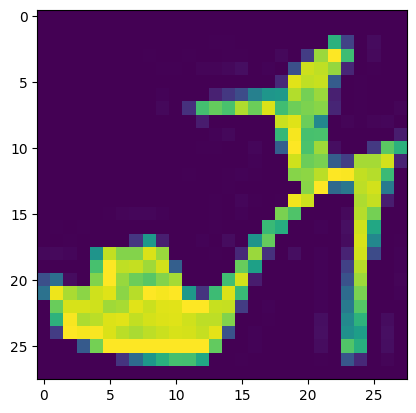

In [5]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :", ytrain[imgIndex])
plt.imshow(image)

In [6]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [20]:
# building neural network architecture
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [27]:
# training a classification model with neural networks
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2777 - accuracy: 0.9004 - val_loss: 0.3293 - val_accuracy: 0.8800
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9021 - val_loss: 0.3389 - val_accuracy: 0.8738
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2706 - accuracy: 0.9031 - val_loss: 0.3259 - val_accuracy: 0.8812
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2673 - accuracy: 0.9040 - val_loss: 0.3194 - val_accuracy: 0.8854
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2644 - accuracy: 0.9051 - val_loss: 0.3252 - val_accuracy: 0.8832
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2611 - accuracy: 0.9064 - val_loss: 0.3343 - val_accuracy: 0.8818
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2578 - accuracy: 0.9072 - val_loss: 0.3266 - val_accuracy:

In [28]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 44ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [29]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]
